In [1]:
import mne
import numpy as np
from fooof import FOOOF
import matplotlib.pyplot as plt
import os

/var/folders/xz/wdpx172132z1772nqchkm3wdqzjpvm/T/ipykernel_71662/3110534777.py:3: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [13]:

# Load the EEG data from the EEGLAB .set file
# Replace 'your_eeg_file.set' with your actual file
eeg_file = '008_dark_removedsegments.set'
raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
cond = 'dark'


Reading /Users/rpant3/Documents/Deprivation_STM/07_Analysis/02_Preprocessing/008/008_dark_removedsegments.fdt
Reading 0 ... 1157974  =      0.000 ...  4631.896 secs...


/var/folders/xz/wdpx172132z1772nqchkm3wdqzjpvm/T/ipykernel_71662/2786069676.py:4: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
/var/folders/xz/wdpx172132z1772nqchkm3wdqzjpvm/T/ipykernel_71662/2786069676.py:4: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['VEOG', 'HEOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


In [3]:
print(raw.ch_names)
ch_indices = list(enumerate(raw.ch_names))

['Fpz', 'Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz', 'Iz', 'F2', 'FC2', 'C2', 'CP2', 'P2', 'AF4', 'F4', 'FC4', 'C4', 'CP4', 'P4', 'PO4', 'F6', 'FC6', 'C6', 'CP6', 'P6', 'Fp2', 'AF8', 'F8', 'FT8', 'T8', 'TP8', 'P8', 'PO8', 'O2', 'F10', 'FT10', 'TP10', 'P10', 'PO10', 'O10', 'F1', 'FC1', 'C1', 'CP1', 'P1', 'AF3', 'F3', 'FC3', 'C3', 'CP3', 'P3', 'PO3', 'F5', 'FC5', 'C5', 'CP5', 'P5', 'Fp1', 'AF7', 'F7', 'FT7', 'T7', 'TP7', 'P7', 'PO7', 'O1', 'F9', 'FT9', 'TP9', 'P9', 'PO9', 'O9', 'VEOG', 'HEOG']


In [4]:
print(ch_indices)

[(0, 'Fpz'), (1, 'Fz'), (2, 'FCz'), (3, 'Cz'), (4, 'CPz'), (5, 'Pz'), (6, 'POz'), (7, 'Oz'), (8, 'Iz'), (9, 'F2'), (10, 'FC2'), (11, 'C2'), (12, 'CP2'), (13, 'P2'), (14, 'AF4'), (15, 'F4'), (16, 'FC4'), (17, 'C4'), (18, 'CP4'), (19, 'P4'), (20, 'PO4'), (21, 'F6'), (22, 'FC6'), (23, 'C6'), (24, 'CP6'), (25, 'P6'), (26, 'Fp2'), (27, 'AF8'), (28, 'F8'), (29, 'FT8'), (30, 'T8'), (31, 'TP8'), (32, 'P8'), (33, 'PO8'), (34, 'O2'), (35, 'F10'), (36, 'FT10'), (37, 'TP10'), (38, 'P10'), (39, 'PO10'), (40, 'O10'), (41, 'F1'), (42, 'FC1'), (43, 'C1'), (44, 'CP1'), (45, 'P1'), (46, 'AF3'), (47, 'F3'), (48, 'FC3'), (49, 'C3'), (50, 'CP3'), (51, 'P3'), (52, 'PO3'), (53, 'F5'), (54, 'FC5'), (55, 'C5'), (56, 'CP5'), (57, 'P5'), (58, 'Fp1'), (59, 'AF7'), (60, 'F7'), (61, 'FT7'), (62, 'T7'), (63, 'TP7'), (64, 'P7'), (65, 'PO7'), (66, 'O1'), (67, 'F9'), (68, 'FT9'), (69, 'TP9'), (70, 'P9'), (71, 'PO9'), (72, 'O9'), (73, 'VEOG'), (74, 'HEOG')]


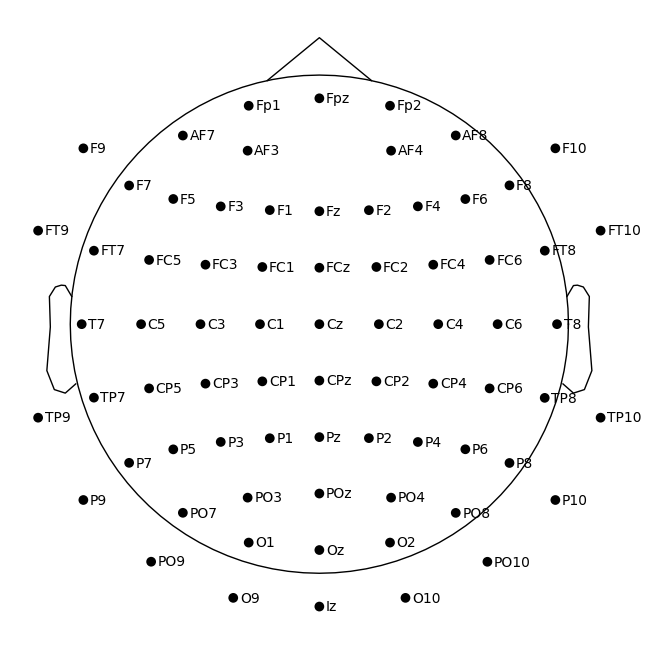

[70, 64, 57, 51, 45, 5, 13, 19, 25, 32, 38, 71, 65, 52, 6, 20, 33, 39, 40, 66, 7, 34, 72, 8]


In [5]:
mne.viz.plot_sensors(raw.info, show_names=True)

# list put together from electrode montage
occipital_indices = [71, 65, 58, 52, 46, 6, 14, 20, 26, 33, 39, 72, 66, 53, 7, 21, 34, 40, 41, 67, 8, 35, 73, 9]
# subtract one to correspond to matlab because python is 0 based
o = [o - 1 for o in occipital_indices]
print(o)

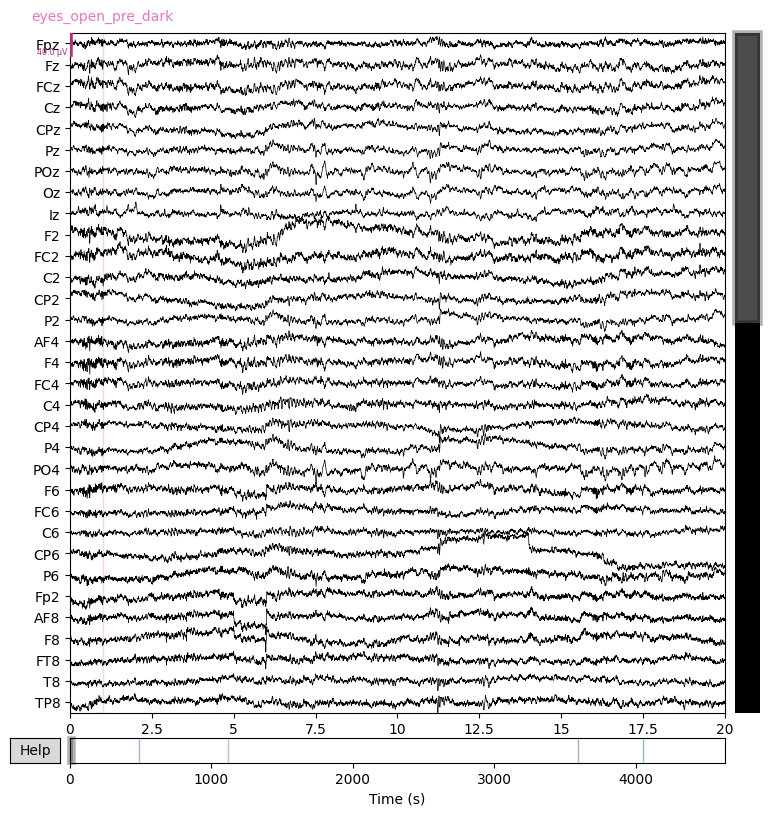

Used Annotations descriptions: ['boundary', 'deprivation_dark', 'eyes_closed_post_dark', 'eyes_closed_pre_dark', 'eyes_open_post_dark', 'eyes_open_pre_dark']
[[    250       0       6]
 [ 121298       0       1]
 [ 121549       0       4]
 [ 278812       0       1]
 [ 279063       0       2]
 [ 898460       0       1]
 [ 898711       0       5]
 [1013234       0       1]
 [1013485       0       3]]


In [14]:
raw.plot(duration=20, n_channels=32)

# Create epochs (assuming you've preprocessed or marked events in EEGLAB)
events, event_id = mne.events_from_annotations(raw)

print(events)  

In [15]:
# Extract events and event IDs from annotations
events, event_id = mne.events_from_annotations(raw)

# Retrieve event annotations
annotations = raw.annotations
event_times = annotations.onset
event_labels = annotations.description

# Find relevant epochs by setting up start and end points for each based on your criteria
relevant_epochs = []
for i, (time, label) in enumerate(zip(event_times, event_labels)):
    # Check if this is a relevant event and is not "boundary"
    if label != "boundary":
        # Find the next "boundary" event to determine the end of this epoch
        next_boundary_index = next((j for j in range(i + 1, len(event_labels)) if event_labels[j] == "boundary"), None)
        
        if next_boundary_index is not None:
            # If a boundary event is found, use its time as the end of the epoch
            end_time = event_times[next_boundary_index]
        else:
            # If no boundary is found, use the end of the recording as the end time
            end_time = raw.times[-1]  # Use the last timestamp in the raw data as the end time
        
        # Append the epoch details (start time, end time, and label)
        relevant_epochs.append((time, end_time, label))

# Now `relevant_epochs` should contain all 5 epochs as expected
print("Total epochs:", len(relevant_epochs))
for epoch in relevant_epochs:
    print("Start:", epoch[0], "End:", epoch[1], "Label:", epoch[2])


Used Annotations descriptions: ['boundary', 'deprivation_dark', 'eyes_closed_post_dark', 'eyes_closed_pre_dark', 'eyes_open_post_dark', 'eyes_open_pre_dark']
Total epochs: 5
Start: 1.0 End: 485.194 Label: eyes_open_pre_dark
Start: 486.196 End: 1115.25 Label: eyes_closed_pre_dark
Start: 1116.252 End: 3593.842 Label: deprivation_dark
Start: 3594.844 End: 4052.938 Label: eyes_open_post_dark
Start: 4053.94 End: 4631.896 Label: eyes_closed_post_dark


In [16]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fpz, Fz, FCz, Cz, CPz, Pz, POz, Oz, Iz, F2, FC2, C2, CP2, P2, ...
 chs: 73 EEG, 2 EOG
 custom_ref_applied: False
 dig: 76 items (3 Cardinal, 73 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 75
 projs: []
 sfreq: 250.0 Hz
>

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


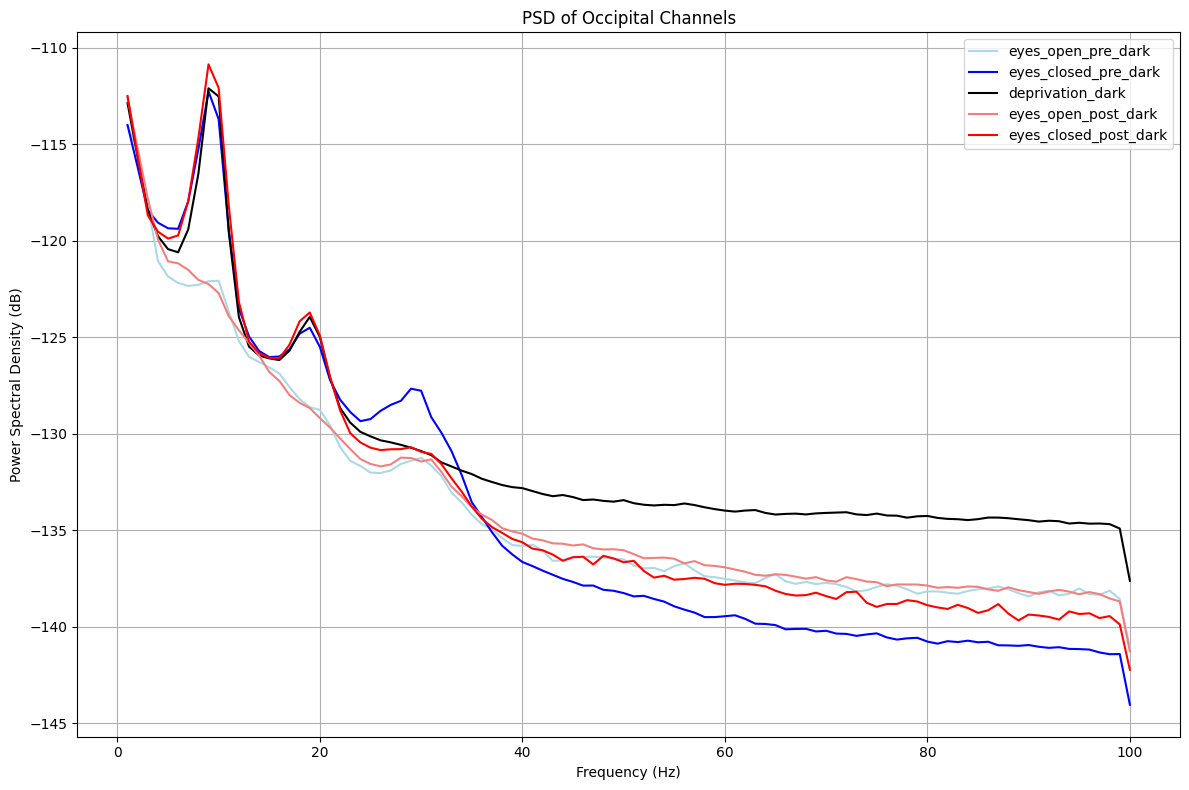

<Figure size 640x480 with 0 Axes>

In [17]:
# Define plot parameters
plt.figure(figsize=(12, 8))  # Set the figure size
# colors = ['b', 'g', 'r', 'c', 'm']  # Different colors for each epoch
colors = ['lightblue', 'blue', 'black', 'lightcoral', 'red']  
epoch_labels = [epoch[2] for epoch in relevant_epochs]  # Labels for each epoch

# Loop through each epoch, compute and plot PSD
for i, (start, end, label) in enumerate(relevant_epochs):
    # Extract the epoch data and pick only channels specified in `o`
    epoch_data = raw.copy().crop(tmin=start, tmax=end)
    selected_data = epoch_data.pick(picks=o)  # Pick only channels in `o`
    
    # Compute PSD for this epoch 
    psds = selected_data.compute_psd(method="welch", fmin=1, fmax=100, n_fft=250)
    psds, freqs = psds.get_data(return_freqs=True)
    # Convert PSD to dB and average across the selected channels
    psds_db = 10 * np.log10(psds.mean(axis=0))  # Average across the selected channels
    
    # Plot the PSD
    plt.plot(freqs, psds_db, color=colors[i % len(colors)], label=f'{label}')

# Add plot details
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('PSD of Occipital Channels')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f'{cond}_PSD_Occipital.png')

Processing from 1.0 to 485.194 for event 'eyes_open_pre_dark'
Effective window size : 1.000 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.2768, 1.3925                                         
                                                                                                  
             

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fooof/core/reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))


Processing from 486.196 to 1115.25 for event 'eyes_closed_pre_dark'
Effective window size : 1.000 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.1780, 1.5297                                         
                                                                                                  
       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fooof/core/reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))


Processing from 1116.252 to 3593.842 for event 'deprivation_dark'
Effective window size : 1.000 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.2311, 1.2481                                         
                                                                                                  
         

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fooof/core/reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))


Processing from 3594.844 to 4052.938 for event 'eyes_open_post_dark'
Effective window size : 1.000 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.1570, 1.4413                                         
                                                                                                  
      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fooof/core/reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))


Processing from 4053.94 to 4631.896 for event 'eyes_closed_post_dark'
Effective window size : 1.000 (s)
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -11.1273, 1.4681                                         
                                                                                                  
     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fooof/core/reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))


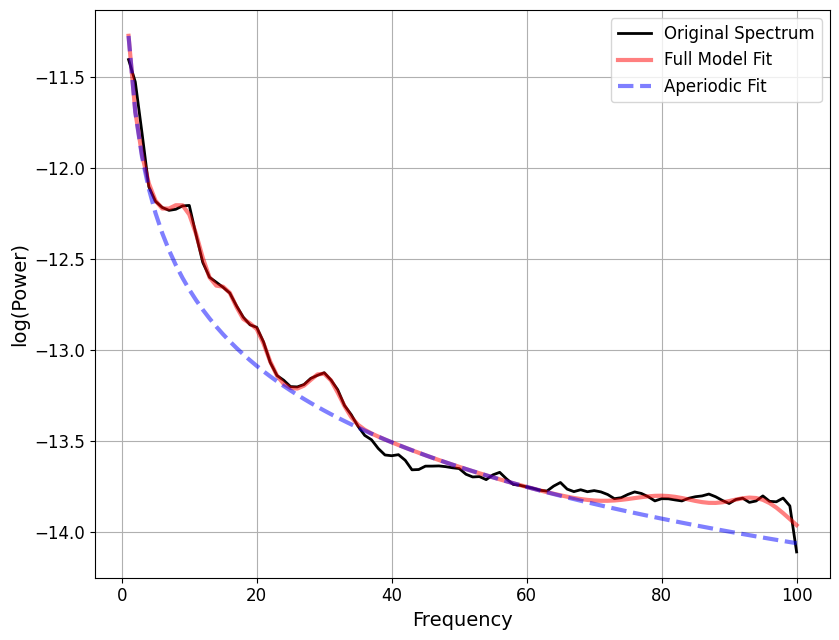

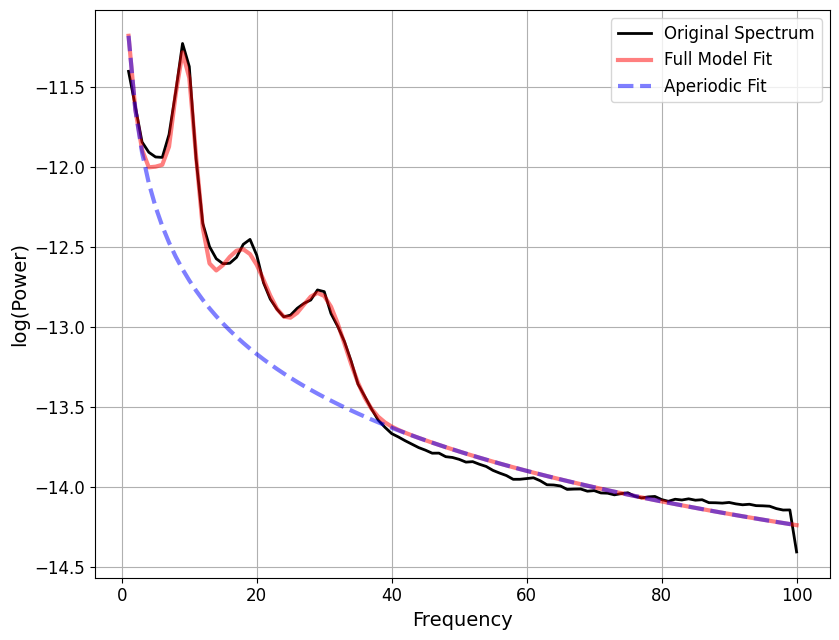

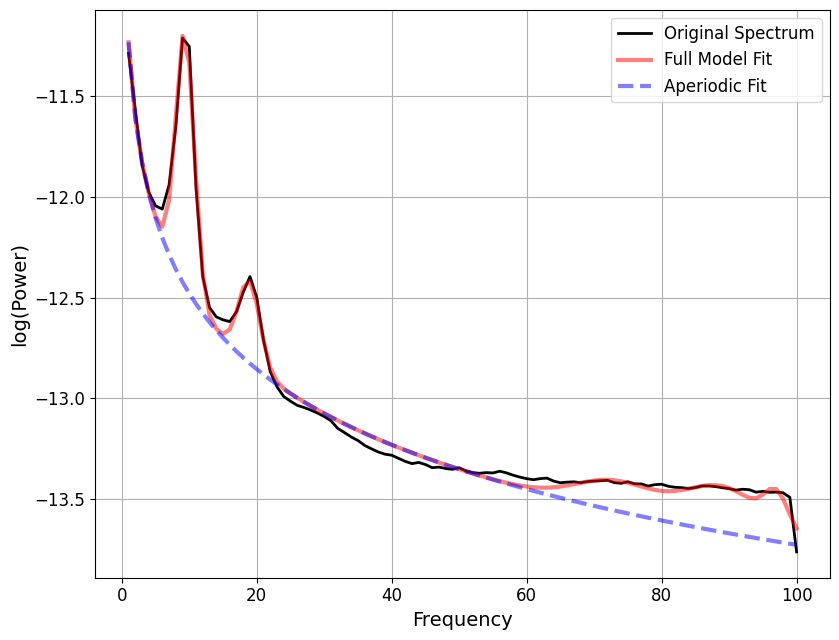

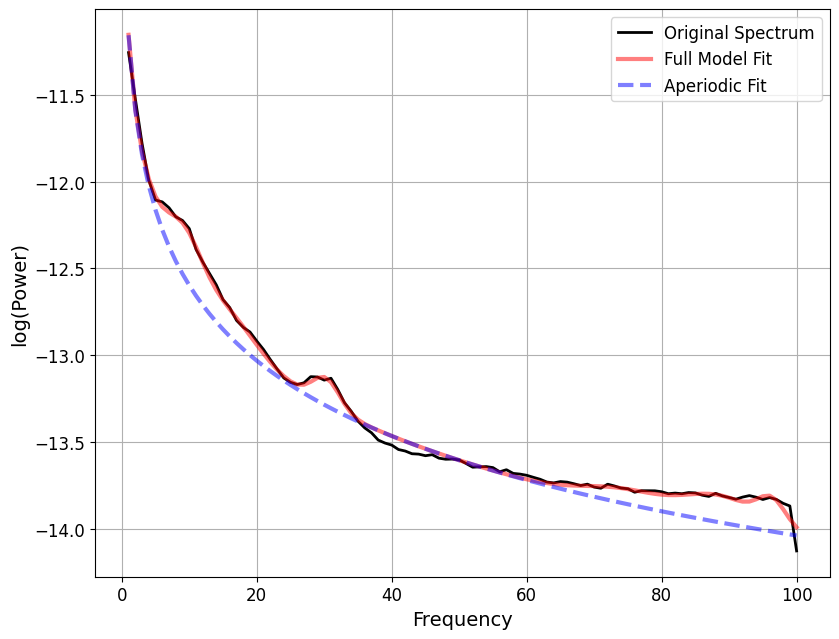

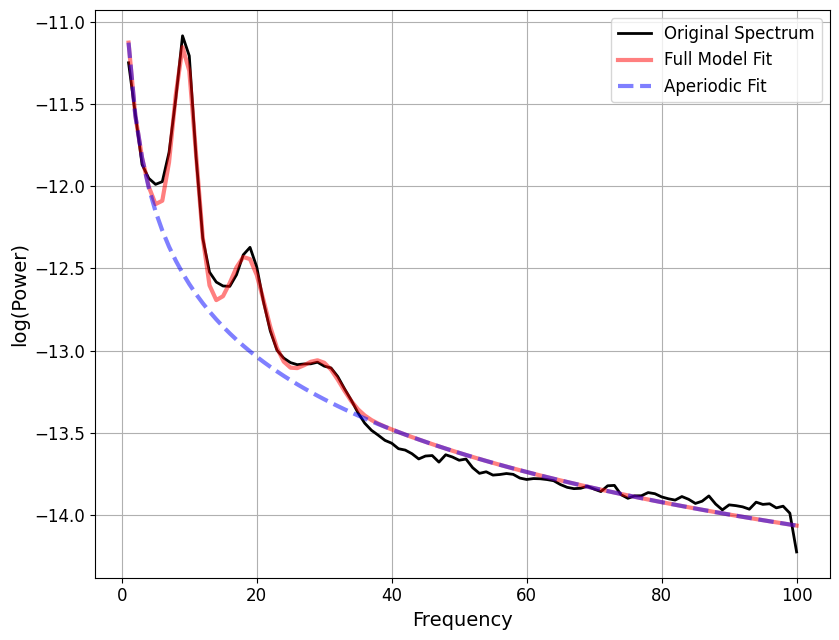

In [20]:
# Define the frequency range for power spectral density (PSD) analysis
# could be 1-60, 1-20 or 1-100 for our analysis
fmin, fmax = 1, 100
# Make the output directory 
opdir = f'cleaned_fooof_{fmin}-{fmax}'
if not os.path.exists(opdir): 
    os.mkdir(opdir)

# Initialize the FOOOF object 
fooof = FOOOF(peak_width_limits=[2, 12], peak_threshold=2, min_peak_height=0.1)

# Process each custom epoch
for i, (start, end, label) in enumerate(relevant_epochs):
    print(f"Processing from {start} to {end} for event '{label}'")

    # Select data for this custom epoch from raw data
    epoch_data = raw.copy().crop(tmin=start, tmax=end)

    # Compute the PSD for the current epoch
    psd = epoch_data.compute_psd(method='welch', fmin=fmin, fmax=fmax, n_fft=250, n_jobs=1)
    psds, freqs = psd.get_data(return_freqs=True)
    psd_occip = psds[o,:]

    # Average the PSD across occip channels
    psd_avg = np.mean(psd_occip, axis=0)

    # Fit FOOOF to the averaged PSD
    fooof.fit(freqs, psd_avg)

    # Print the FOOOF results for this condition 
    fooof.print_results()

    # Save FOOOF results with the event name included in the filename
    fooof.save(f'cleaned_fooof_{fmin}-{fmax}_{label}.json', opdir, save_results=True)

    # Optionally, visualize the FOOOF fit for each epoch
    fooof.plot()
    
    fooof.save_report(f'cleaned_fooof_plot_{fmin}-{fmax}_{label}.png', opdir)